# Self-Driving Car Engineer Nanodegree


## Project: Traffic Sign Classifier

**Test data source & references**

1. Data-set from GTSRB web-site as per project requirements -- [German Traffic Sign Repo](benchmark.ini.rub.de/?section=gtsrb&subsection=dataset#Imageformat)

2. Network model examples were derived from github repos, especially the variant of AlexNet to fit the data-set constraints -- [liferlisiqi GitHub](https://github.com/liferlisiqi/Traffic-Sign-Classifier/blob/master/README.md) 

---

# 1. Data Normalization
This program reads from data-source and performs bsic data analysis and summarization. It then normlaizes the data and chaches the normalized data sets into a pickle file for further network processing. 

>**Note**: Data normalization is applied to the given data-set as well as the downloaded German Traffic Sign data-base. See sections towards the end of this notebook for the GTSRB data-processing. 

In [1]:
### Import packages required for notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import datetime
import pickle
import csv
import random
import os
import math
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten
import tensorflow as tf
import cv2

print("Packages imported ...")

Packages imported ...


---
## 1.1 The Data Loader

In [2]:
# Load pickled data

# TODO: Fill this in based on where you saved the training and testing data

#
# Read traffic signnames  
#
with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for rows in reader:
        signname_hash = {rows[0]:rows[1] for rows in reader}

training_file = "./train.p"
validation_file= "./valid.p"
testing_file = "./test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train, X_train_size, X_train_loc = train['features'], train['labels'], train['sizes'], train['coords']
X_valid, y_valid, X_valid_size, X_valid_loc = valid['features'], valid['labels'], valid['sizes'], valid['coords']
X_test, y_test, X_test_size, X_test_loc = test['features'], test['labels'], test['sizes'], test['coords']

#
# Dataset summary
#
total_samples = len(X_train)+len(X_valid)+len(X_test) 
print("Unique labels = ",len(set(train['labels'])))
print("Training set: ")
print("\t Number of samples = ",len(X_train), ":({0:.2f}%)".format(len(X_train)/total_samples*100))
print("\t Image dimension   = ",X_train.shape[1],"x", X_train.shape[2],"x", X_train.shape[3])
print("\t Data types (X, y) = ",X_train.dtype,",", y_train.dtype)
print("\t Data range (X, y) = ",np.ptp(X_train),",", np.ptp(y_train))
print("Validation set: ")
print("\t Number of samples = ",len(X_valid), ":({0:.2f}%)".format(len(X_valid)/total_samples*100))
print("\t Image dimension   = ",X_valid.shape[1],"x", X_valid.shape[2],"x", X_valid.shape[3])
print("\t Data types (X, y) = ",X_valid.dtype,",", y_valid.dtype)
print("\t Data range (X, y) = ",np.ptp(X_valid),",", np.ptp(y_valid))
print("Test set: ")
print("\t Number of samples = ",len(X_test), ":({0:.2f}%)".format(len(X_test)/total_samples*100))
print("\t Image dimension   = ",X_test.shape[1],"x", X_test.shape[2],"x", X_test.shape[3])
print("\t Data types (X, y) = ",X_test.dtype,",", y_test.dtype)
print("\t Data range (X, y) = ",np.ptp(X_test),",", np.ptp(y_test))

Unique labels =  43
Training set: 
	 Number of samples =  34799 :(67.13%)
	 Image dimension   =  32 x 32 x 3
	 Data types (X, y) =  uint8 , uint8
	 Data range (X, y) =  255 , 42
Validation set: 
	 Number of samples =  4410 :(8.51%)
	 Image dimension   =  32 x 32 x 3
	 Data types (X, y) =  uint8 , uint8
	 Data range (X, y) =  255 , 42
Test set: 
	 Number of samples =  12630 :(24.36%)
	 Image dimension   =  32 x 32 x 3
	 Data types (X, y) =  uint8 , uint8
	 Data range (X, y) =  255 , 42


---
## 1.2 Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. 

> **Note**: These co-ordinates assume the original image resolution. The pickled data contains resized versions (32 x 32) of the images.

Data summary includes resolution and range information for each of the `training`, `validation` and `test` data-sets along with a relative distribution of the images into the various traffic-sign labels. 

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


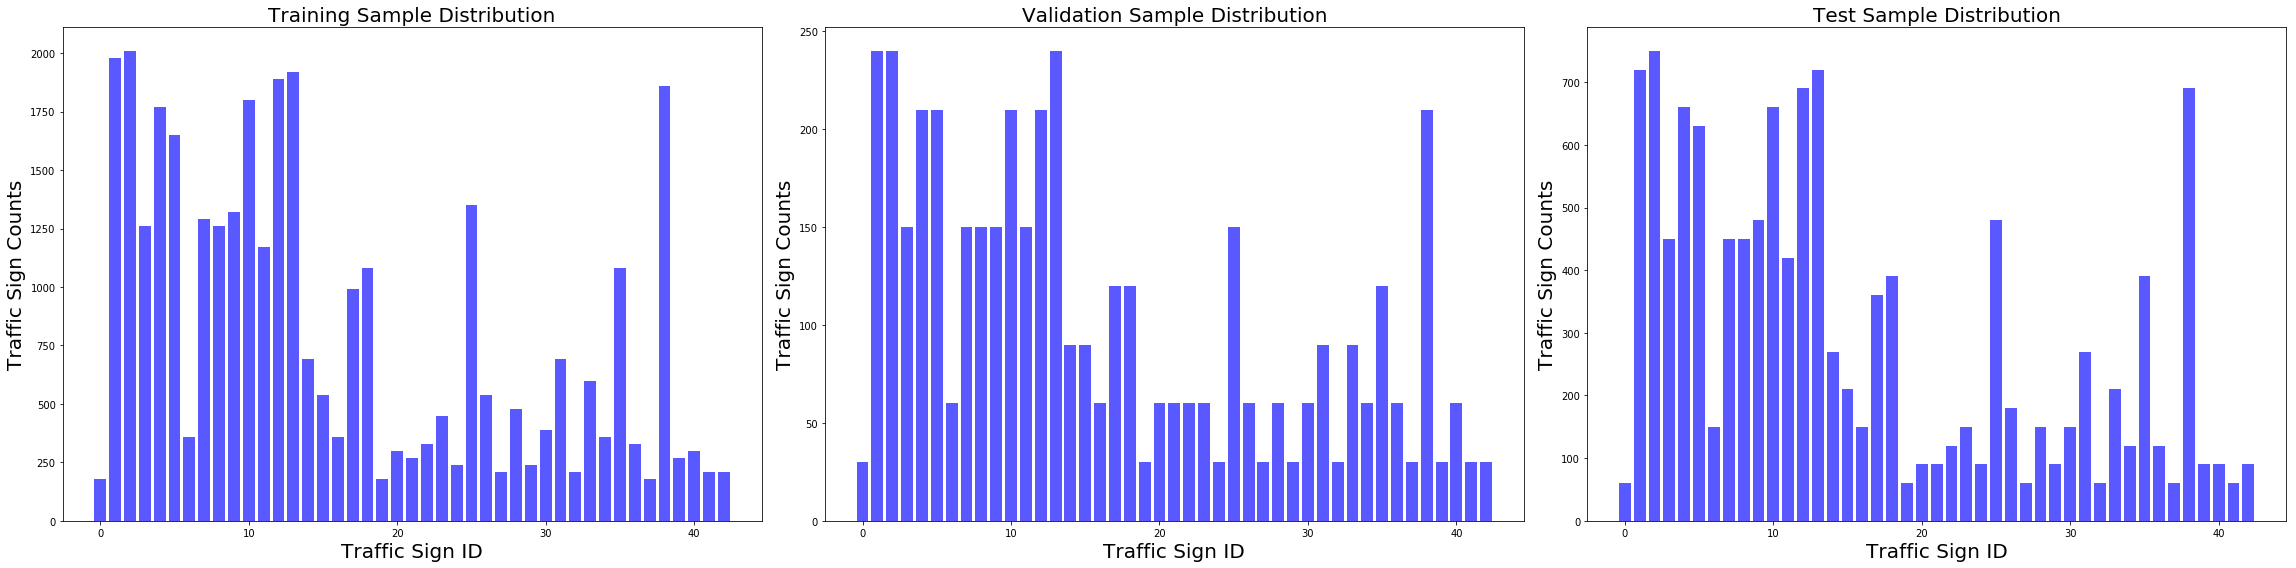

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1],X_train.shape[2],X_train.shape[3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(train['labels']))
train_distribution = np.histogram(y_train,n_classes)
valid_distribution = np.histogram(y_valid,n_classes)
test_distribution = np.histogram(y_test,n_classes)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

# Distribution of the training samples
plt.figure()
plt.subplots(1,3,figsize=(32,8))
plt.subplot(1,3,1)
plt.bar(np.arange(n_classes),train_distribution[0], color='blue', align='center', alpha=0.65)
plt.ylabel('Traffic Sign Counts', fontsize=20)
plt.xlabel('Traffic Sign ID', fontsize=20)
plt.title('Training Sample Distribution', fontsize=20)
plt.subplot(1,3,2)
plt.bar(np.arange(n_classes),valid_distribution[0], color='blue', align='center', alpha=0.65)
plt.ylabel('Traffic Sign Counts', fontsize=20)
plt.xlabel('Traffic Sign ID', fontsize=20)
plt.title('Validation Sample Distribution', fontsize=20)
plt.subplot(1,3,3)
plt.bar(np.arange(n_classes),test_distribution[0], color='blue', align='center', alpha=0.65)
plt.ylabel('Traffic Sign Counts', fontsize=20)
plt.xlabel('Traffic Sign ID', fontsize=20)
plt.title('Test Sample Distribution', fontsize=20)
plt.tight_layout()
plt.savefig('TrafficSigns_DataClassDistributions.png', dpi=100)
plt.show()

---
## 1.3 Visualizing the Data 

Visualize the German Traffic Signs Dataset using the pickled file(s). A random sample of the training imag eset is summarized with a annotation of the labels as well as the RoI of the detected sign. 

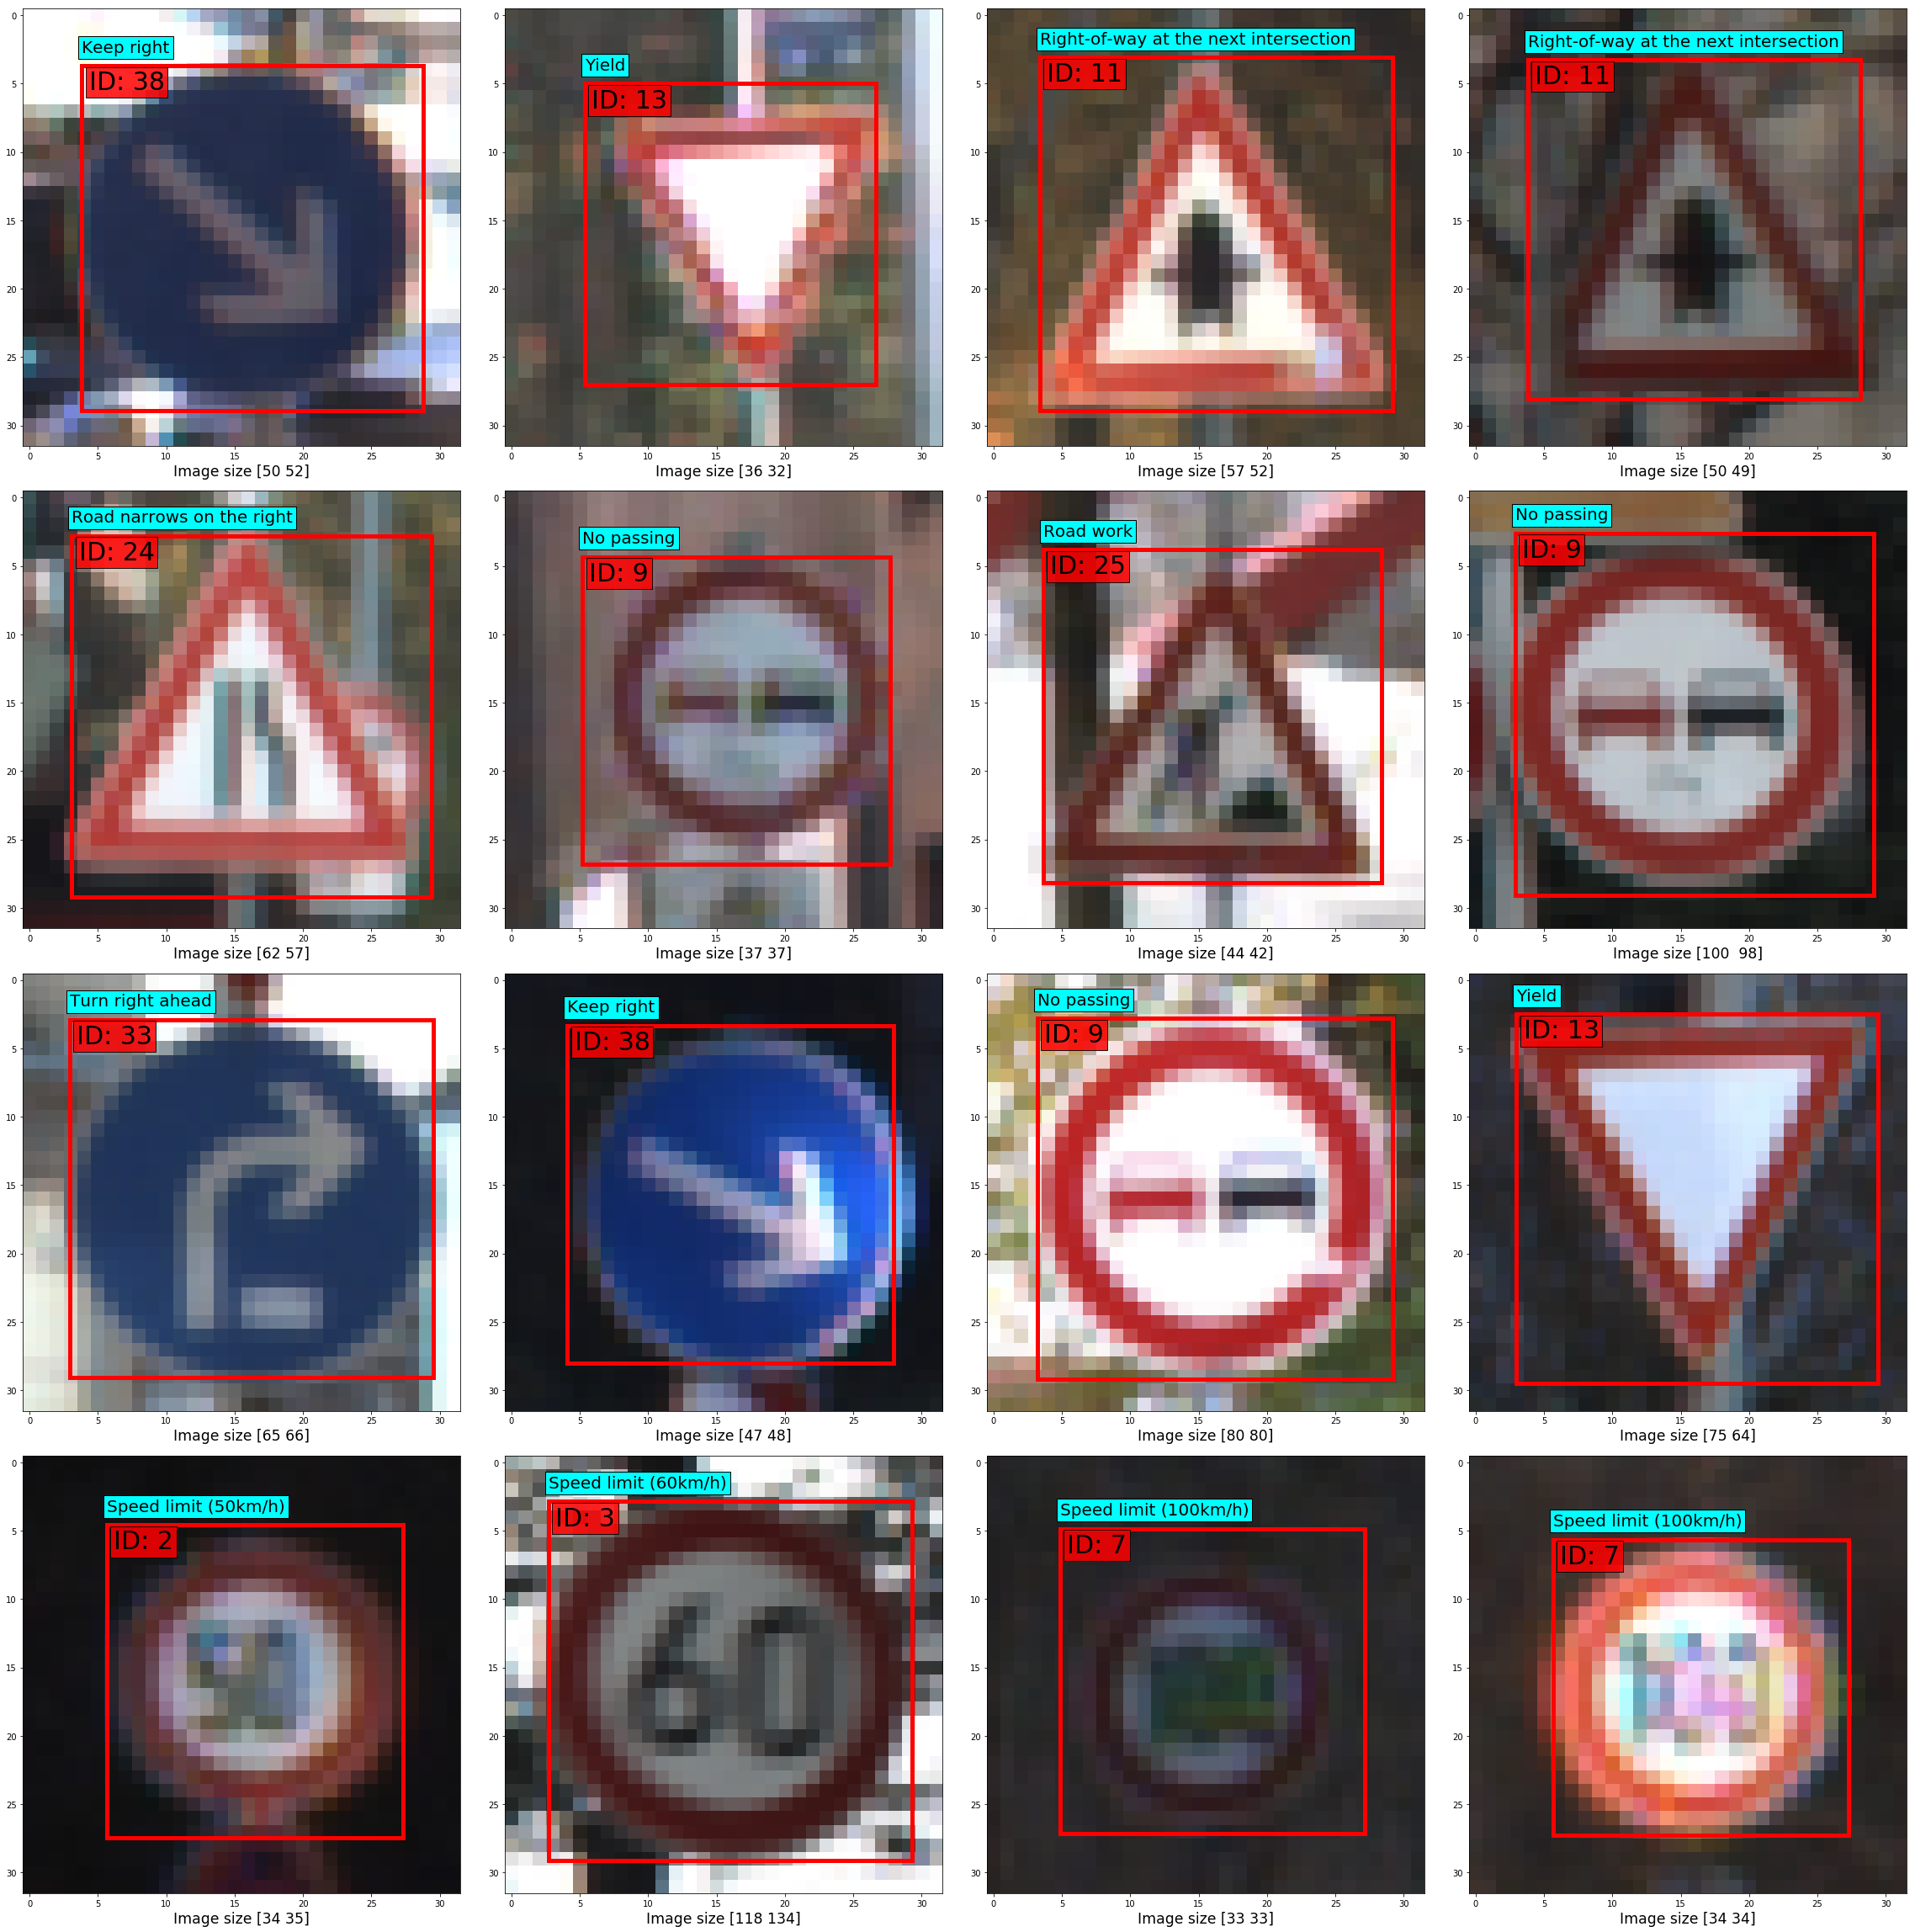

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.
%matplotlib inline

#
# show traffic sign training images in 4x4 grid
#
select_images = np.random.randint(1,n_train,4*4)
plt.figure()
plt.subplots(figsize=(32,32))
#plt.suptitle("Illustrative Training Samples with Traffic-Sign Boundary Annotation", size='xx-large')
for row in range(4):
    for col in range(4):
        idx = 4*row+col
        ax = plt.subplot(4,4,idx+1)        
        plt.imshow(X_train[select_images[idx],:,:,:])
        plt.xlabel("Image size {}".format(X_train_size[select_images[idx]]), size='xx-large')
        # traffic sign coordinates scaled to 32x32
        x1, y1, x2, y2 = X_train_loc[select_images[idx]]
        x1 *= 32/X_train_size[select_images[idx]][0] 
        x2 *= 32/X_train_size[select_images[idx]][0] 
        y1 *= 32/X_train_size[select_images[idx]][1] 
        y2 *= 32/X_train_size[select_images[idx]][1] 
        ax.add_patch(patches.Rectangle((x1,y1), x2-x1, y2-y1, color="red", linewidth=5, fill=False))
        lbl = y_train[select_images[idx]]
        plt.text(x1+.5,y1+1.75,"ID: {}".format(lbl), fontsize=30, bbox=dict(facecolor='red', alpha=0.85))
        plt.text(x1,y1-1,"{}".format(signname_hash[str(lbl)]), fontsize=20, bbox=dict(facecolor='cyan', alpha=1.))
        #print(signname_hash[str(lbl)])
plt.tight_layout()
plt.savefig('TrafficSigns.png', dpi=100)
plt.show()
plt.draw()


---
## 1.4 Data Augmentation

Using data-augmentation to enlarge training set for a more generalized & robust network. 

Simple augmentation techniques are employed here which include
 
 1. Small random image dithers: samples randomly perturbed in 
     - Position ([-2,2] pixels)
     - Scale ([.9,1.1] ratio) and 
     - Rotation ([-15,+15] degrees)
     
Random selections of images with equal sampling from each traffic sign class ID are done with 1/3rd of the samples being applied with the dithers above. 

A simpler technique is to shuffle the selected training set and select each 1/3rd partition to apply the dithering. This is used to simplify the data augmentation process.

>**Note**: For augmentation, only a 1/3 of the entire training set is chosen, so essentially each of the 3 augmentations are applied to only 1/9th of the original image training set. This is done primarily as a method to save on the disk-space as the combined data set now only consumes x1.33 of the original space.  

>**Note**: The training image size & sign RoI locations are not modified after augmentation and replicated in the augmented training set as-is. The argument for this is that simply the dithered/scaled/rotated images are warped/scaled back to original size and hence the RoI ofr the labelled traffic sign should not vary by much, if at all. 


In [5]:
prob = train_distribution[0]/sum(train_distribution[0])
prob = prob/sum(prob)
#print(prob)
#print(np.where(prob<0.015))
low_wgt_idx = np.where((train_distribution[0]/sum(train_distribution[0]))<.015)

aug_data_X = []
aug_data_y = []
aug_data_X_size = []
aug_data_X_loc = []
for idx in range(len(y_train)):
    if (prob[y_train[idx]] < 0.015):
        aug_data_X.append(X_train[idx])
        aug_data_y.append(y_train[idx])
        aug_data_X_size.append(X_train_size[idx])
        aug_data_X_loc.append(X_train_loc[idx])
        
print(np.asarray(aug_data_X).shape)
print(np.asarray(aug_data_y).shape)
print(np.asarray(aug_data_X_size).shape)
print(np.asarray(aug_data_X_loc).shape)

#print(len(aug_data_X))
#print(len(aug_data_y))
#plt.figure()
#plt.bar(np.arange(n_classes),prob, color='blue', align='center', alpha=0.65)

(6060, 32, 32, 3)
(6060,)
(6060, 2)
(6060, 4)


(40859, 32, 32, 3) (40859,) (40859, 2) (40859, 4)
Data augmented ...


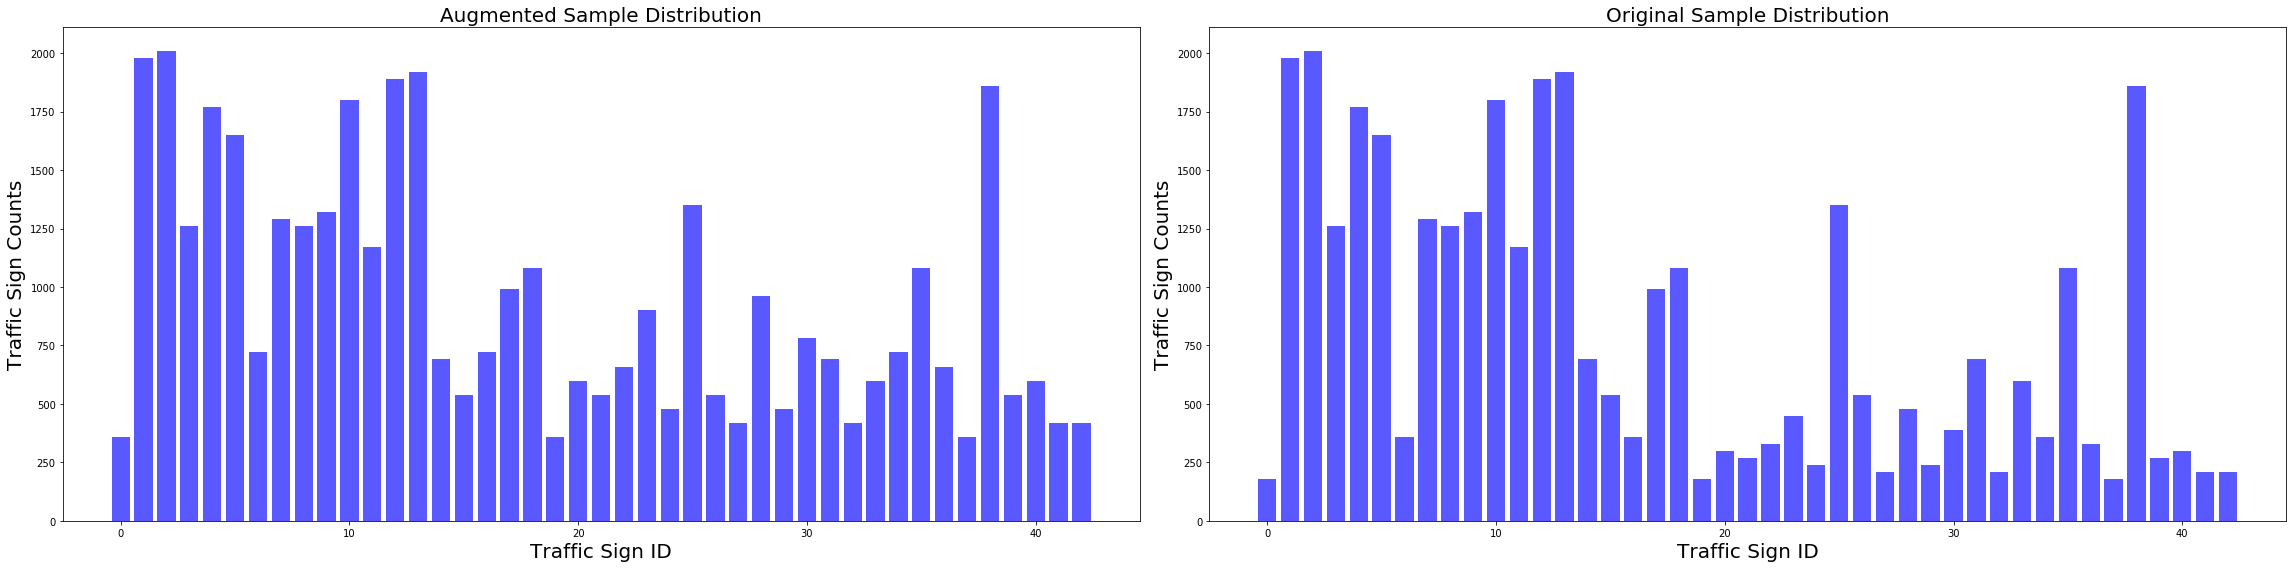

In [6]:
#
# Use OpenCV functions to add dithering
#
# select random samples from training set after shuffling
"""
idx = np.random.randint(1, n_train, int(n_train/3))

prob = np.sort(train_distribution[0]/sum(train_distribution[0]))
prob = prob/sum(prob)
idx = np.random.choice(range(n_classes), size=None, replace=False, p=prob) # in reverse proportion to sample distribution

xx_, yy_ = shuffle (X_train[idx], y_train[idx])
aug_count = len(xx_)
samplecount = int(aug_count/3)
"""

xx_ = aug_data_X
yy_ = aug_data_y
xs_ = aug_data_X_size
xl_ = aug_data_X_loc
aug_count = len(xx_)
samplecount = int(aug_count/3)

# use the first 1/3th of this set to dither training images
idx = range(samplecount)
#print(idx[0])
M = np.float32([[1, 0, 5], [0, 1, 5]])
for index in range(samplecount):
    xx_[index] = cv2.warpAffine(xx_[index], M, (X_train.shape[2], X_train.shape[1]))

# use the second 1/3th of this set to scale training images
idx = range(samplecount, 2*samplecount)
#print(idx[0])
for index in range(samplecount, 2*samplecount):
    tmp = cv2.resize(xx_[index], None, fx=.875, fy=.875, interpolation = cv2.INTER_CUBIC) # 28x28
    xx_[index] = cv2.resize(tmp, (X_train.shape[2], X_train.shape[1]), interpolation = cv2.INTER_CUBIC) # 32x32
    #print(tmp.shape,xx_[index].shape)
    
# use the third 1/3th of this set to rotate training images
idx = range(2*samplecount, 3*samplecount)
#print(idx[0])
M1 = cv2.getRotationMatrix2D((X_train.shape[2]/2, X_train.shape[1]/2), 15, 1)
M2 = cv2.getRotationMatrix2D((X_train.shape[2]/2, X_train.shape[1]/2), -15, 1)
for index in range(2*samplecount, 3*samplecount, 2):
    xx_[index] = cv2.warpAffine(xx_[index], M1, (X_train.shape[2], X_train.shape[1]))
    xx_[index+1] = cv2.warpAffine(xx_[index+1], M2, (X_train.shape[2], X_train.shape[1]))


# add augmented data set to training data    
xx_ = np.asarray(xx_)
yy_ = np.asarray(yy_)
xs_ = np.asarray(xs_)
xl_ = np.asarray(xl_)
X_train = np.append(X_train, xx_, axis=0)    
y_train = np.append(y_train, yy_)
X_train_size = np.append(X_train_size, xs_, axis=0)    
X_train_loc = np.append(X_train_loc, xl_, axis=0)

print(X_train.shape, y_train.shape, X_train_size.shape, X_train_loc.shape)
 
print("Data augmented ...")    


train_distribution_new = np.histogram(y_train,n_classes)
# Distribution of the training samples
plt.figure()
plt.subplots(1,2,figsize=(32,8))
plt.subplot(1,2,1)
plt.bar(np.arange(n_classes),train_distribution_new[0], color='blue', align='center', alpha=0.65)
plt.ylabel('Traffic Sign Counts', fontsize=20)
plt.xlabel('Traffic Sign ID', fontsize=20)
plt.title('Augmented Sample Distribution', fontsize=20)
plt.subplot(1,2,2)
plt.bar(np.arange(n_classes),train_distribution[0], color='blue', align='center', alpha=0.65)
plt.ylabel('Traffic Sign Counts', fontsize=20)
plt.xlabel('Traffic Sign ID', fontsize=20)
plt.title('Original Sample Distribution', fontsize=20)
plt.tight_layout()
plt.savefig('TrafficSigns_DataClassDistributions_BeforeAfter.png', dpi=100)
plt.show()

---
## 1.5 Data Pre-process 

**Data Normalization**
Get all data (`train`, `validation` and `test`) data to zero-mean and unit variance. As our image data-set is image based, we have provided 2 modes to normalize the set. After normaliztion, data should lie approximately within range `[-1, 1]`.

 1. **`simple`** : normalize the 8bit images using the `x = 2*x/range(x) - 1`
 2. **`minmax`** : normalize using the range of the images 
 3. **`meandev`** : normalize using the set mean and std-deviation (takes a little bit more time)

No appreciable performance boost has been observed with the more involved normalization and hence the `simple` mode is preferred. 

**Using Grayscale**
Using grayscale images can help classifier performance an dgray scaled versions of the image set is also normalized before caching in a pickle file.  

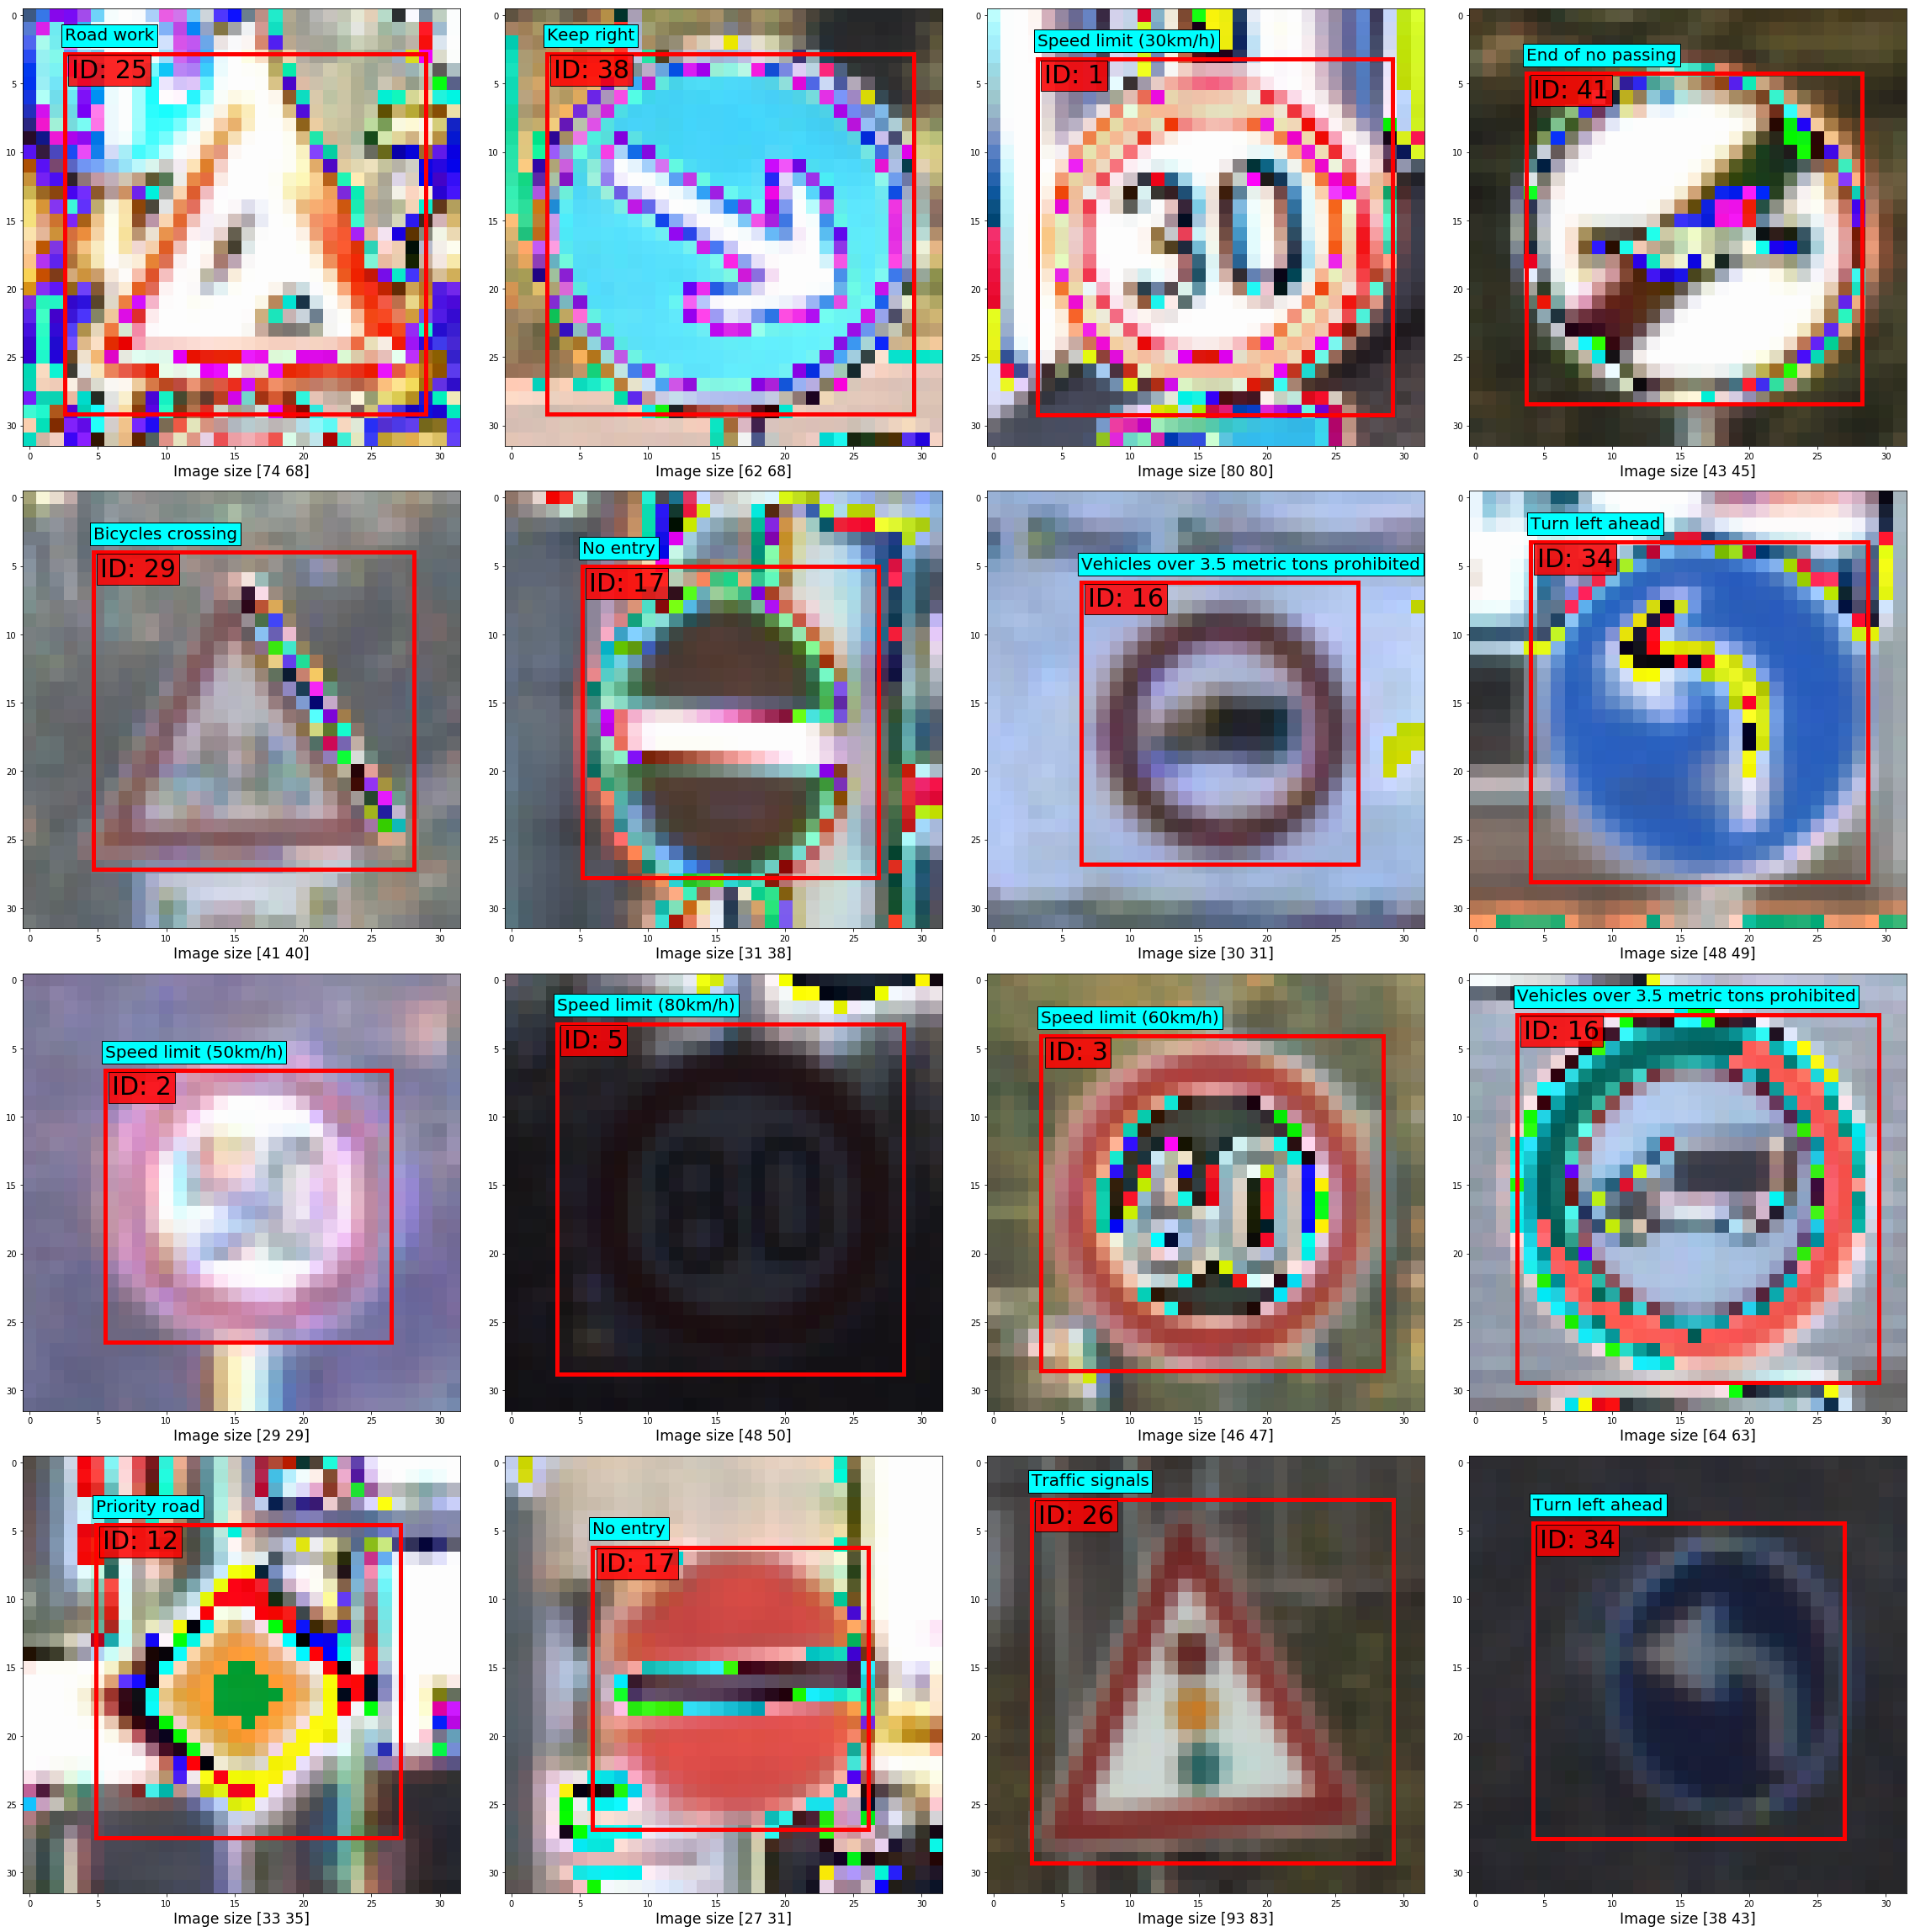

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#
# Output array statistics
#
def print_stats(X, arrayname = ''):
    print(arrayname, ": {StdDev, Mean, Range, Min, Max} =\n\t", X.std(axis=(0,1,2)), X.mean(axis=(0,1,2)), X.ptp(), X.min(axis=(0,1,2)), X.max(axis=(0,1,2)))    
    return

#
# Data normalize
#
def data_normalize(X, mode='simple', grayscale = False):
    if (mode == 'minmax'):
        if (grayscale):
            x_min = X.min(axis=None, keepdims=True)
            x_max = X.max(axis=None, keepdims=True)
        else:
            x_min = X.min(axis=(0,1,2), keepdims=True)
            x_max = X.max(axis=(0,1,2), keepdims=True)
        try:
            tmp = 1/(x_max-x_min)
        except ZeroDivisionError:
            print("Divide by zero: failed data-normalization")
        return ((X - x_min)/(x_max-x_min) - 1.).astype(dtype=np.float32)
    elif (mode == 'simple'):
        if (grayscale):
            x_range = abs(X.min(axis=None, keepdims=True) - X.max(axis=None, keepdims=True))
        else:
            x_range = abs(X.min(axis=(0,1,2), keepdims=True) - X.max(axis=(0,1,2), keepdims=True))
        try:
            tmp = 1/(x_range)
        except ZeroDivisionError:
            print("Divide by zero: failed data-normalization")           
        #return ((2.0*(X.astype(dtype=np.float64) / x_range) - 1.).astype(np.float64))
        return (((X.astype(dtype=np.float32) / 128.) - 1.).astype(np.float32))
    elif (mode == 'meandev'):
        if (grayscale):
            x_mean = X.mean(axis=None, keepdims=True, dtype=np.float32)
            x_stddev = X.std(axis=None, keepdims=True, dtype = np.float32)
        else:
            x_mean = X.mean(axis=(0,1,2), keepdims=True, dtype=np.float32)
            x_stddev = X.std(axis=(0,1,2), keepdims=True, dtype=np.float32)
        try:
            tmp = 1/(x_stddev)
        except ZeroDivisionError:
            print("Divide by zero: failed data-normalization")   
        return ((X - x_mean)/(x_stddev)).astype(dtype=np.float32)       
    else:
        return X.astype(dtype=np.float32)    
#
# Convert RGB data to Gray-scale
#
def rgb2gray(rgb):
    r, g, b = rgb[:,:,:,0], rgb[:,:,:,1], rgb[:,:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray.astype(dtype=np.float32)        

# image set processing
def normalize_set(image_set):
    return image_set.astype(np.float32) / 128. - 1.
def rgb2gray_set(image_set):
    gray = np.empty((len(image_set),32,32,1), dtype=np.float32)
    idx = 0
    for img in image_set:
        g = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        g = np.asarray(g.reshape(32,32,1))
        gray[idx] = g.astype(dtype=np.float32)
        idx+=1
    return gray
    
# Data formatting
X_train = 1.0 * X_train.astype(dtype=np.float32)
X_valid = 1.0 * X_valid.astype(dtype=np.float32)
X_test = 1.0 * X_test.astype(dtype=np.float32)
y_train = y_train.astype(dtype=np.int32)
y_valid = y_valid.astype(dtype=np.int32)
y_test = y_test.astype(dtype=np.int32)

    
# convert to grayscale
X_train_gray = rgb2gray_set(X_train)
X_valid_gray = rgb2gray_set(X_valid)
X_test_gray = rgb2gray_set(X_test)

# normalize all data (train, validation, test)
# using {mode:simple} OR {mode:meandev} OR {mode:minmax} OR {mode:none} for normalization
X_train_norm = normalize_set(X_train)
X_valid_norm = normalize_set(X_valid)
X_test_norm = normalize_set(X_test)
X_train_gray_norm = normalize_set(X_train_gray)
X_valid_gray_norm = normalize_set(X_valid_gray)
X_test_gray_norm = normalize_set(X_test_gray)

#
# Verify data-normalization
#
"""
tol = 1e-12
if ( (abs(X_train_norm.std() - 1.0) < tol)  or (abs(X_valid_norm.std() - 1.0) < tol) or (abs(X_test_norm.std() - 1.0) < tol)):
    print()
else:
    print("WARN: data normalization failed, sample deviation != 1.0")
if ( (X_train_norm.mean() < tol)  or (X_valid_norm.mean() < tol) or (X_test_norm.mean() < tol)):
    print()
else:
    print("WARN: data normalization failed, sample mean != 0.0")
"""

#
# show traffic sign training images in 4x4 grid
#
select_images = np.random.randint(1,n_train,4*4) # use the ones selected/displayed above
fig3 = plt.figure()
plt.subplots(figsize=(32,32))
#plt.suptitle("Illustrative Training Samples with Traffic-Sign Boundary Annotation", size='xx-large')
for row in range(4):
    for col in range(4):
        idx = 4*row+col
        ax = plt.subplot(4,4,idx+1)        
        plt.imshow(X_train_norm[select_images[idx]], cmap='gray')
        plt.xlabel('Image size {}'.format(X_train_size[select_images[idx]]), size='xx-large')
        # traffic sign coordinates scaled to 32x32
        x1, y1, x2, y2 = X_train_loc[select_images[idx]]
        x1 *= 32/X_train_size[select_images[idx]][0] 
        x2 *= 32/X_train_size[select_images[idx]][0] 
        y1 *= 32/X_train_size[select_images[idx]][1] 
        y2 *= 32/X_train_size[select_images[idx]][1] 
        ax.add_patch(patches.Rectangle((x1,y1), x2-x1, y2-y1, color='red', linewidth=5, fill=False))
        lbl = y_train[select_images[idx]]
        plt.text(x1+.5,y1+1.75,"ID: {}".format(lbl), fontsize=30, bbox=dict(facecolor='red', alpha=0.85))
        plt.text(x1,y1-1,"{}".format(signname_hash[str(lbl)]), fontsize=20, bbox=dict(facecolor='cyan', alpha=1.))
        #print(signname_hash[str(lbl)])
        
plt.tight_layout()
plt.savefig('TrafficSigns_Normalized.png', dpi=100)
plt.show()
plt.draw()


---
## 1.6 Data Cache

The data-set is then shuffled to avoid implicit biases in the labelled sets.
The entire data-set (both RGB & gray-scaled versoins) are then pickled in a file cache.  

In [8]:
print(y_train.shape, X_train_size.shape, X_train_loc.shape, X_train_norm.shape)

(40859,) (40859, 2) (40859, 4) (40859, 32, 32, 3)


In [9]:
# Choose nromalized RGB or normalized gray-scale images
# -- RGB chosen here
#X_trn, y_trn = shuffle(X_train_norm, y_train, X_train_size, X_train_loc)
#X_val, y_val = shuffle(X_valid_norm, y_valid, X_valid_size, X_valid_loc)
#X_tst, y_tst = shuffle(X_test_norm, y_test, X_test_size, X_test_loc)
#X_trn, y_trn = shuffle(X_train_norm_gray, y_train)
#X_val, y_val = shuffle(X_valid_norm_gray, y_valid)
#X_tst, y_tst = shuffle(X_test_norm_gray, y_test)


# Save the data for easy access
pickle_file = './dataset/Trafficsigns_NormalizedDataSet.p'
if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open(pickle_file, 'wb') as pfile:
            pickle.dump(
                {
                    # select min set of data to save disk space
                    
                    #'train_features': X_train,
                    'train_labels': y_train,
                    'train_size': X_train_size,
                    'train_roi': X_train_loc,
                    'trn_norm': X_train_norm,
                    #'train_norm': X_train_norm,
                    'train_gray_norm': X_train_gray_norm,
                    
                    #'valid_features': X_valid,
                    'valid_labels': y_valid,
                    'valid_size': X_valid_size,
                    'valid_roi': X_valid_loc,
                    'val_norm': X_valid_norm,
                    #'valid_norm': X_valid_norm,
                    'valid_gray_norm': X_valid_gray_norm,

                    #'test_features': X_test,
                    'test_labels': y_test,
                    'test_size': X_test_size,
                    'test_roi': X_test_loc,
                    'tst_norm': X_test_norm,
                    #'test_norm': X_test_norm,
                    'test_gray_norm': X_test_gray_norm,

                    'signname_hash': signname_hash,
                },
                pfile, protocol=2)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

Saving data to pickle file...
Data cached in pickle file.


---
## 1.7 German Traffic Sign DB

**Using Test Image Data-set**
[Test Images](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset#Downloads)

** Process Test Images **

  1. Read annotations from csv file
  2. Resize images to 32x32x3 RGB format in 8bit color
  3. Normalize and cache in a pickle file
  

In [10]:
#
# Headers: {Filename, Width, Height, Roi.X1, Roi.Y1, Roi.X2, Roi.Y2, ClassId}
with open('./GermanTrafficSignDB/GT-final_test.csv', mode='r') as infile:
    #reader = csv.reader(infile)
    #for rows in reader:
    #    signname_hash = {rows[0]:rows[1:] for rows in reader}
    #    print(rows[0:])
    reader = csv.DictReader(infile, skipinitialspace=True)
    test_dict = {name: [] for name in reader.fieldnames}
    for row in reader:
        for name in reader.fieldnames:
            test_dict[name].append(row[name])
#
# Display sample test images with attributes            
#
num_test_samples = len(test_dict['Filename'])            
filelist = test_dict['Filename']
width = np.asarray(test_dict['Width'], dtype=np.float32) 
height = np.asarray(test_dict['Height'], dtype=np.float32) 
label = np.asarray(test_dict['ClassId'], dtype=np.uint8) 
X1 = np.asarray(test_dict['Roi.X1'], dtype=np.float32) 
Y1 = np.asarray(test_dict['Roi.Y1'], dtype=np.float32) 
X2 = np.asarray(test_dict['Roi.X2'], dtype=np.float32) 
Y2 = np.asarray(test_dict['Roi.Y2'], dtype=np.float32) 
#
# Process images to 32x32 (for leNet5 classifier)
#
print("German Traffic Sign DB -- {} test image samples".format(num_test_samples))
GTSRB_test_images = np.zeros(num_test_samples*32*32*3).reshape(num_test_samples,32,32,3)
for idx in range(num_test_samples):    
    fname = ".\GermanTrafficSignDB\GTSRB\Final_Test\Images\{}".format(filelist[idx])    
    img = cv2.resize(cv2.imread(fname), (32, 32)) # read image & resize to 32x32
    img = np.asarray(img, dtype=np.float32).reshape(1,32,32,3)
    GTSRB_test_images[idx,:,:,:] = img
    mode = 'simple'
    print("\t Resizing to 32x32: {:2.0%} done".format((idx+1)/num_test_samples), end="\r")
print()    
# normalize test data
GTSRB_test_norm = normalize_set(GTSRB_test_images)

#
# cache into pickle file
#
# Save the data for easy access
pickle_file = './dataset/GTSRBData_processed.p'
if not os.path.isfile(pickle_file):
    print('Saving GTSRB Pre-processed data to pickle file...')
    try:
        with open(pickle_file, 'wb') as pfile:
            pickle.dump(
                {
                    'test_images': GTSRB_test_images,
                    'test_norm': GTSRB_test_norm,
                    'labels': label,
                    'width': width,
                    'height': height,
                    'filelist': filelist,
                    'X1': X1,
                    'Y1': Y1,
                    'X2': X2,
                    'Y2': Y2                    
                },
                pfile, protocol=2)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

German Traffic Sign DB -- 12630 test image samples
	 Resizing to 32x32: 100% done
Saving GTSRB Pre-processed data to pickle file...
Data cached in pickle file.
